# Schwachstellenscan Visualisierung/Verarbeitung

In [2]:
%load_ext autoreload
%autoreload
import pandas as pd
import json
from itertools import chain
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

from helper import convert_nuclei_to_dataframe
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Vorverarbeitung der Daten

  * zur Vermeidung der Offenlegung von Schwachstellen wird angepasster anonymisierter Datensatz verwendet

In [3]:
#nuclei_df = convert_nuclei_to_dataframe("data/all_nuclei_scans")

In [4]:
# Nutzung der anonymisierten Daten !!!
nuclei_df = pd.read_csv("data/nuclei_df.csv")

## Balkendiagramm Schwere der gefundenen Schwachstellen und Informationen

  * Großteil ist False Positive oder reine Information

In [7]:
vis_df = pd.DataFrame(nuclei_df['severity'].value_counts()).reset_index()

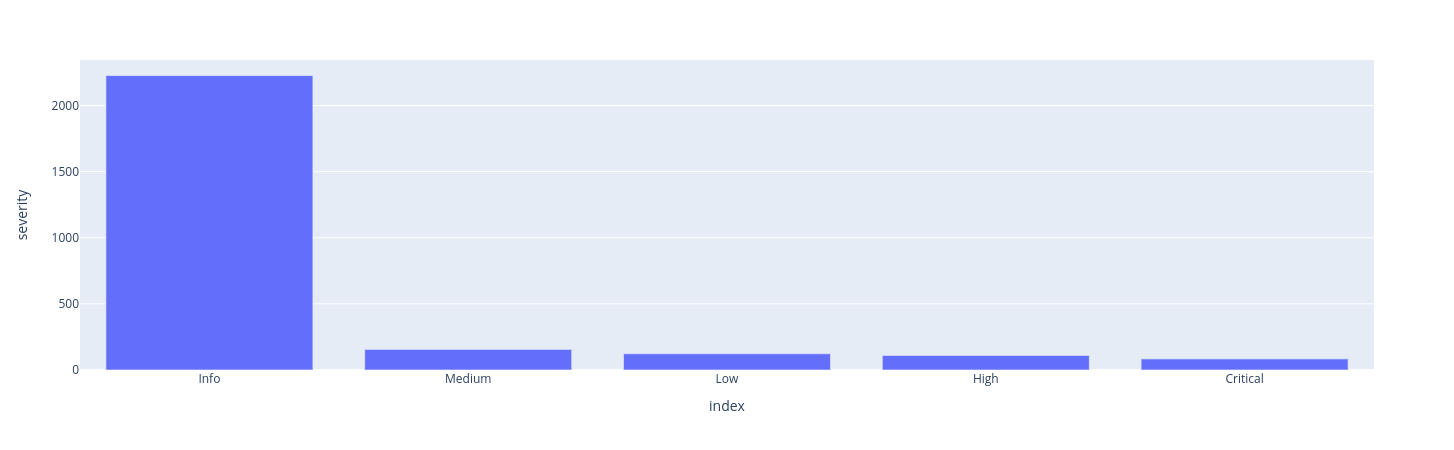

In [8]:
fig = px.bar(vis_df, x='index', y='severity')
fig.show()

# Filter-Interface für Nuclei-Scandaten

  * Graph Darstellung aufgrund der Unmöglichkeit des Clusterings/Kategorisierung wird ein Filter-Interface genutzt
    * mithilfe der "Bordmittel" von Jupyter kann das schnell implementiert werden

In [11]:
nuclei_df = nuclei_df[["templateID", "type", "host_ano", "name", "severity"]]

In [12]:
host_range = list(nuclei_df.host_ano.unique())
host_range.append("ALL")
severity_range = list(nuclei_df.severity.unique())
severity_range.append("ALL")
                      
severity_toggle = widgets.ToggleButtons(
    options=severity_range,
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

regex_text = widgets.Text()

In [13]:
@interact(host=host_range, severity=severity_toggle, not_reg=regex_text)
def filter_nuclei_output(host="ALL", severity=nuclei_df.severity[0], not_reg=""):
    if not_reg=="":
        not_reg = "           "
    if host == "ALL":
        return nuclei_df[(nuclei_df.severity == severity) & 
                         ((~nuclei_df.name.str.contains(not_reg)))]
    elif severity == "ALL":
        return nuclei_df[(nuclei_df.host_ano == host) & 
                         (~nuclei_df.name.str.contains(not_reg))]
    elif (host == "ALL") and (severity == "ALL"):
        return nuclei_df
    else:
        return nuclei_df[(nuclei_df.host_ano == host) & 
                         (nuclei_df.severity == severity) & 
                         (~nuclei_df.name.str.contains(not_reg))]

interactive(children=(Dropdown(description='host', index=191, options=("['CGX']", "['FHM']", "['RSV']", "['JTU…